### Predicting California House Prices (1990s)

This notebook explores the California housing dataset from the 1990s.  
We’ll format the data, load it into a DataFrame, and prepare it for modeling.

## Importing Libraries
We import the necessary Python libraries for data handling and model building.

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing


## Set Display Options
Format output to show more columns and limit float precision for readability.


In [5]:
pd.set_option("display.max_columns", 9)
pd.set_option("display.precision", 4)
pd.set_option("display.width", None)
sns.set(font_scale=2)
sns.set_style("white")

## Load and Preview Dataset



In [6]:
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df["MedHouseVal"] = california.target
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


## Data Summary & Structure


In [7]:
california_df.describe()
# california_df.info()
# california_df.isnull().sum()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


In [8]:
sample_df = california_df.sample(frac=.1, random_state = 17)

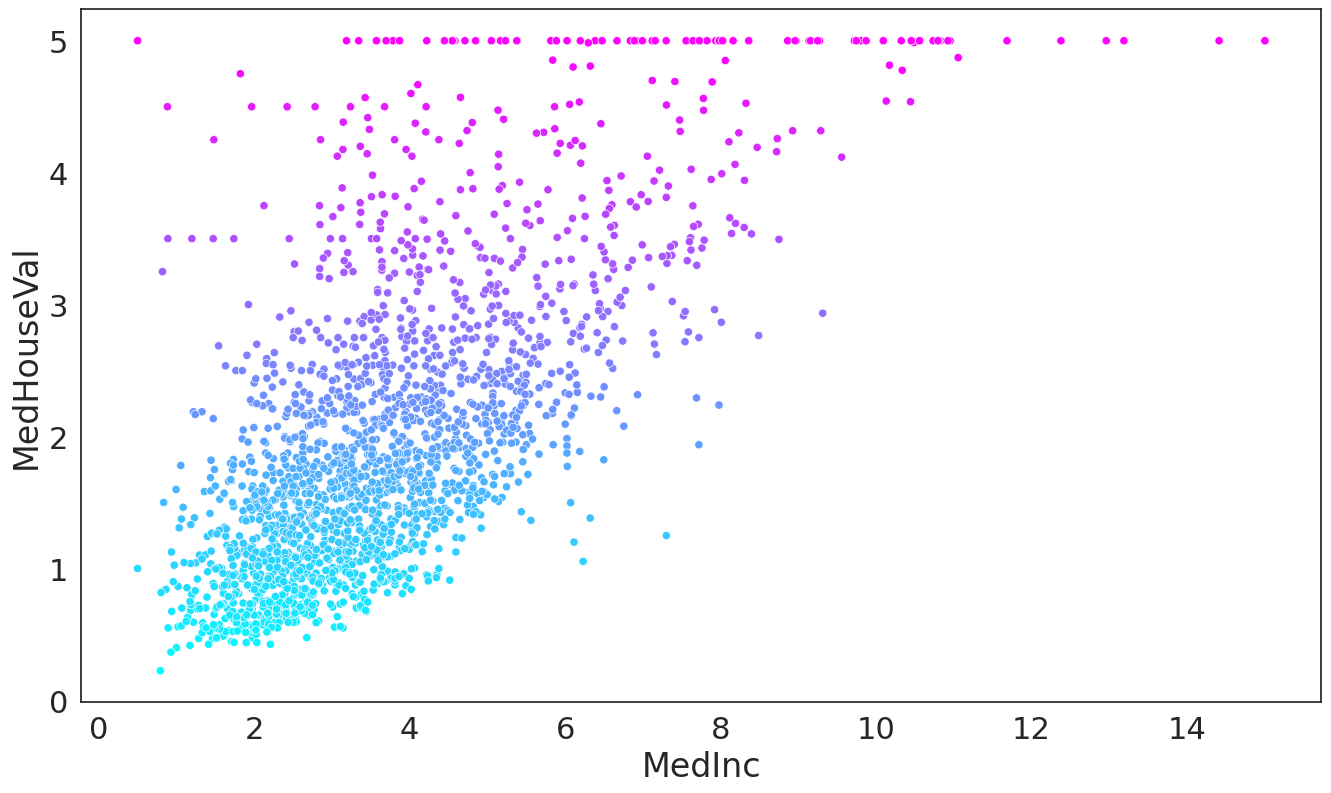

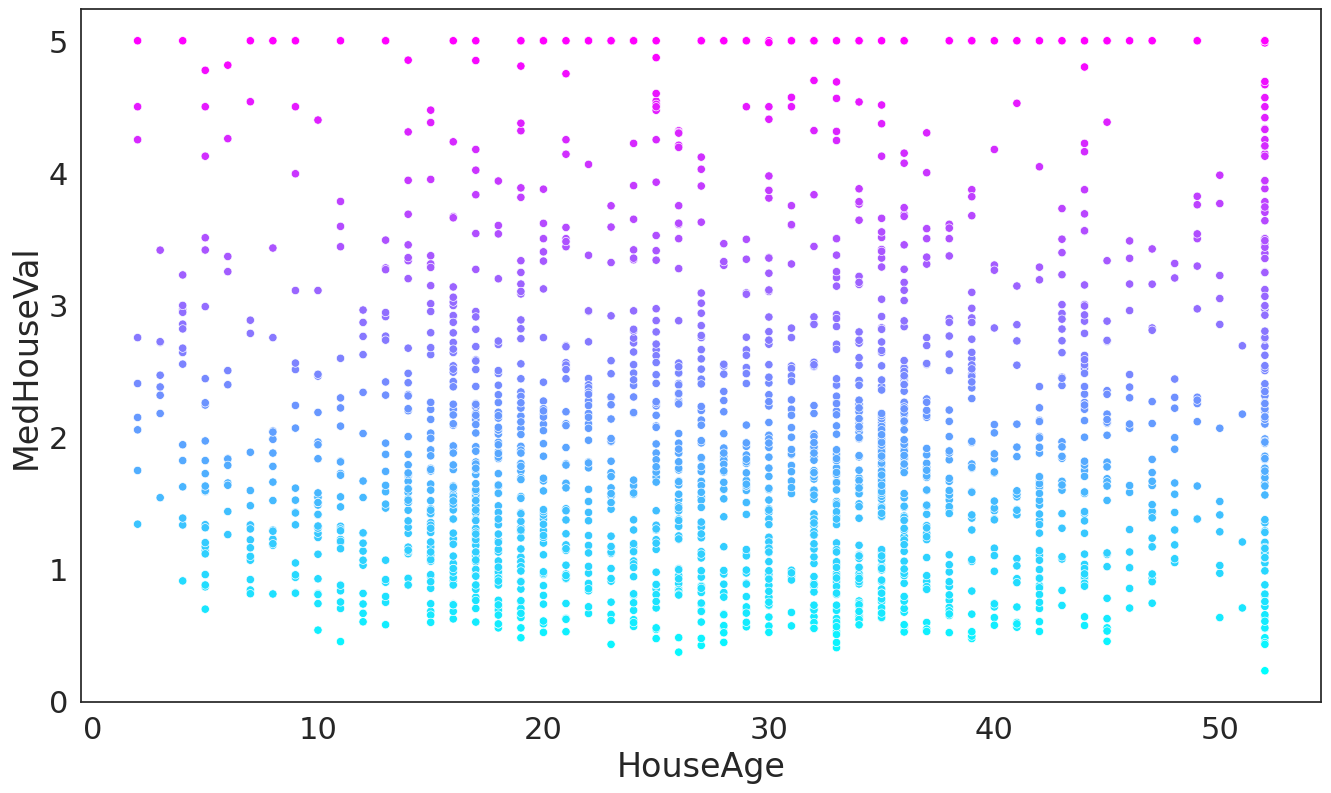

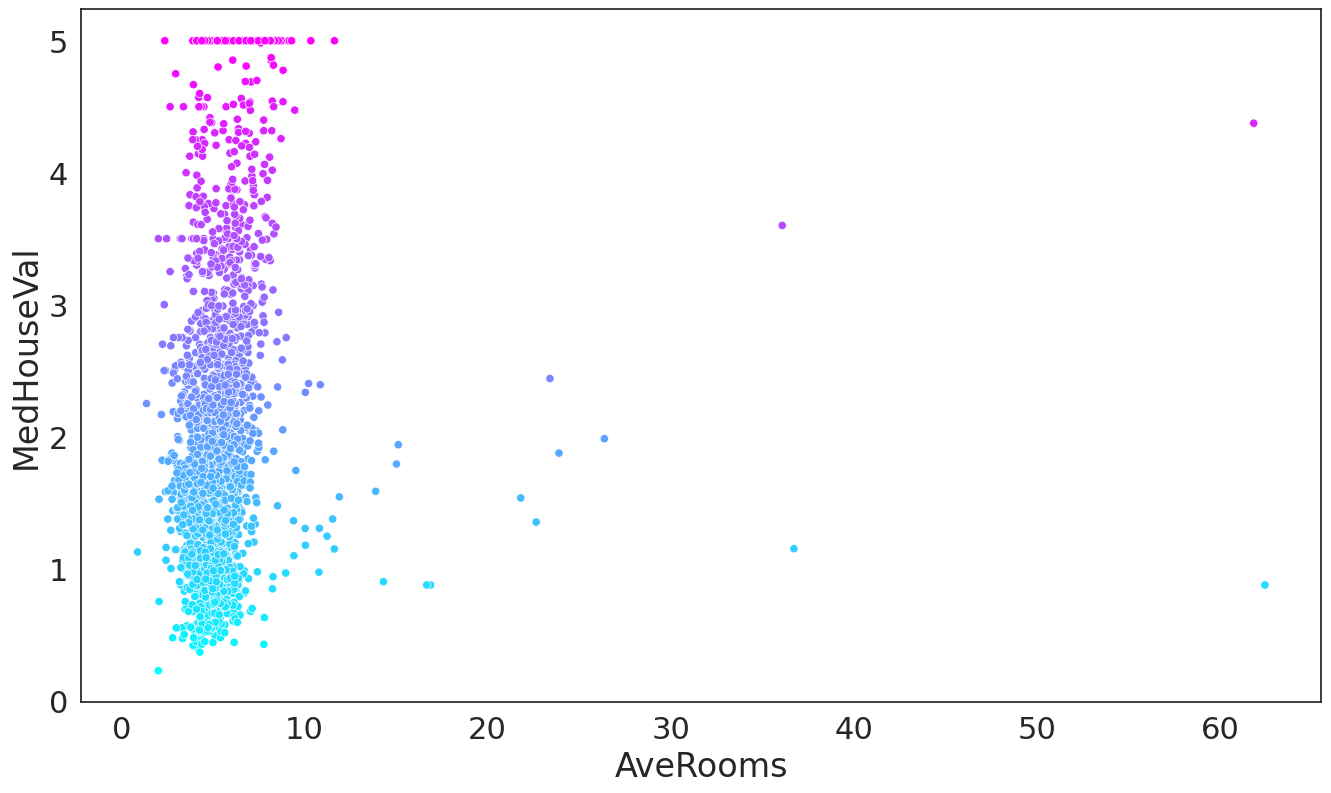

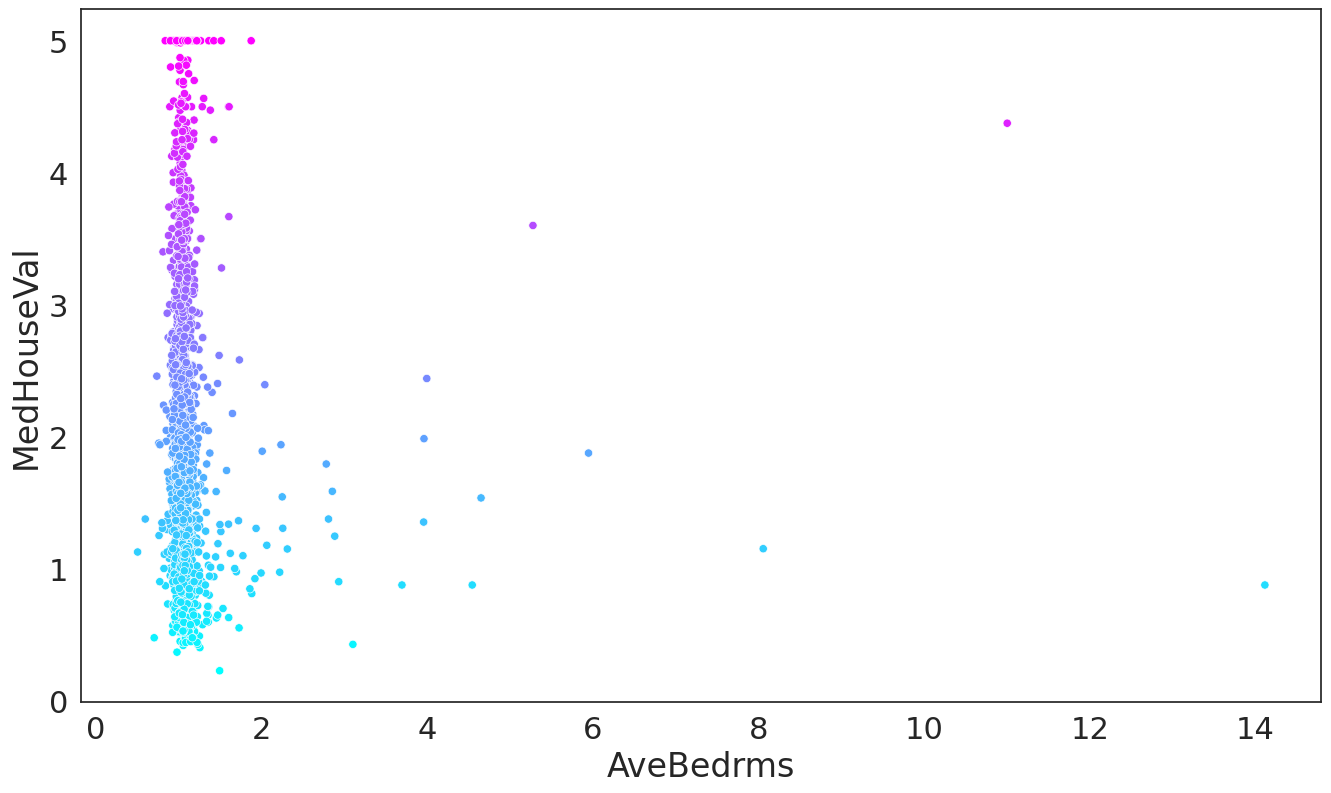

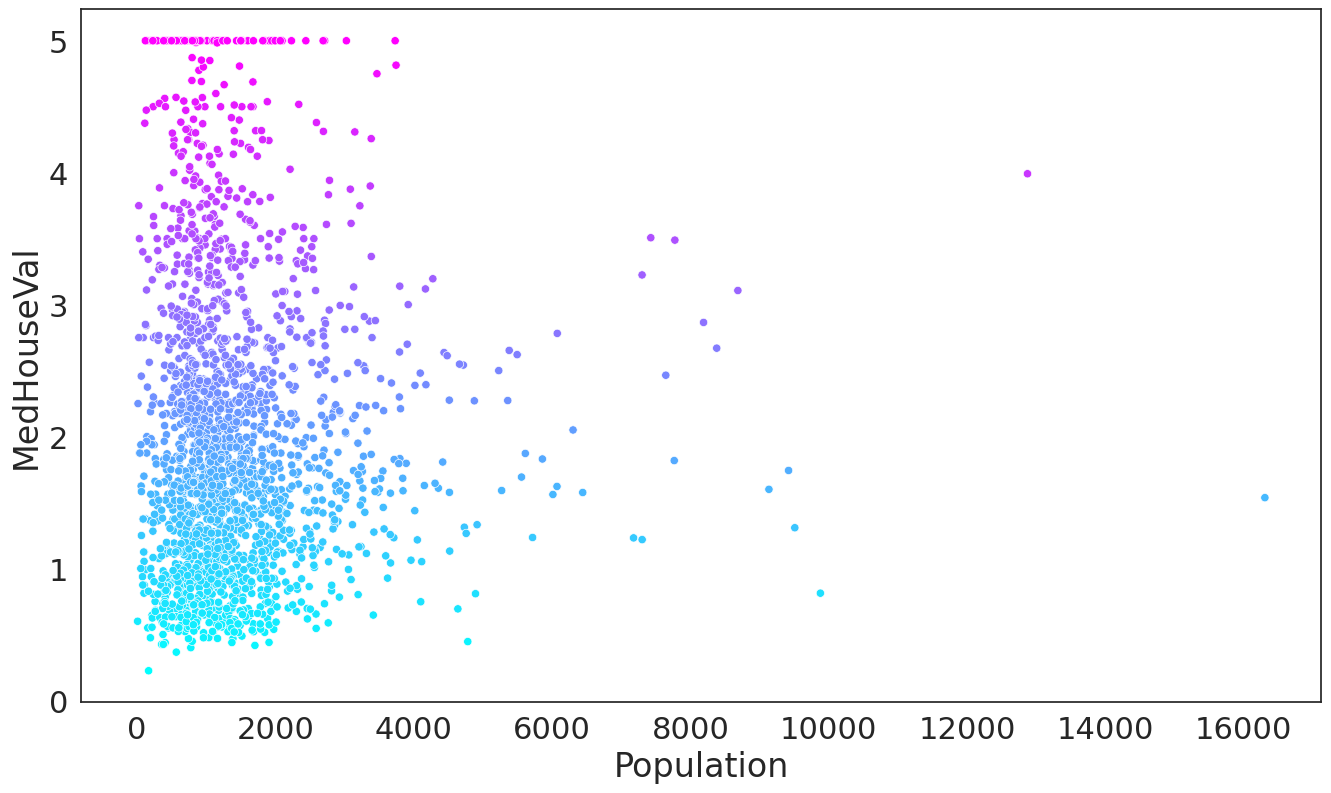

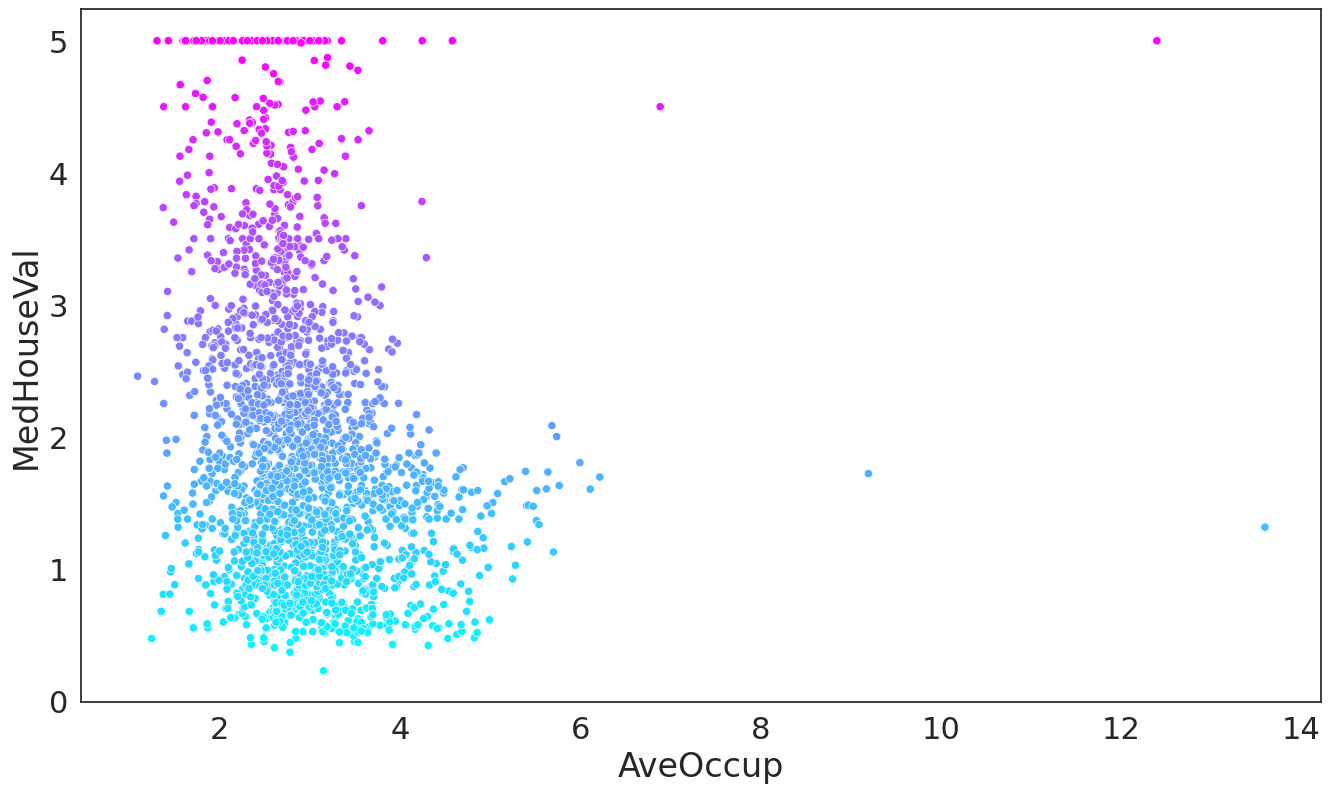

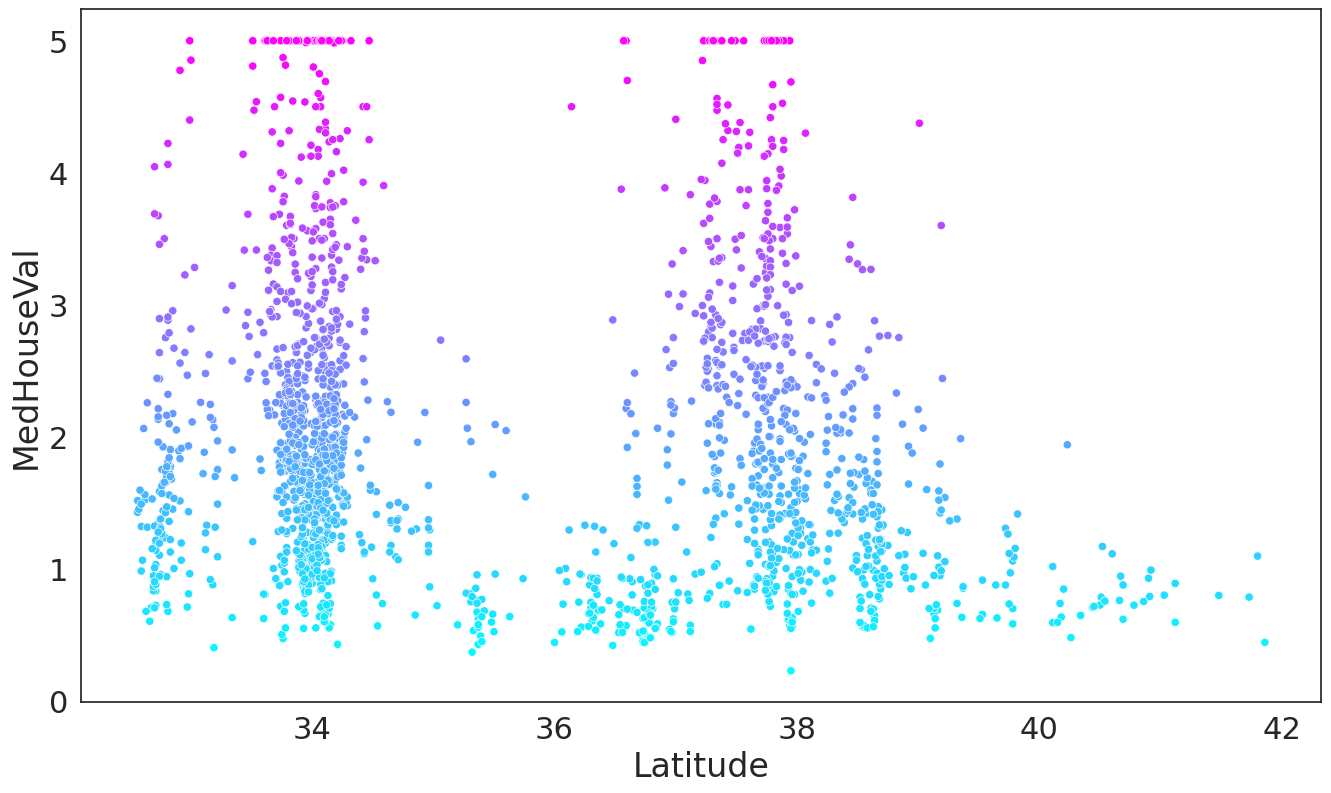

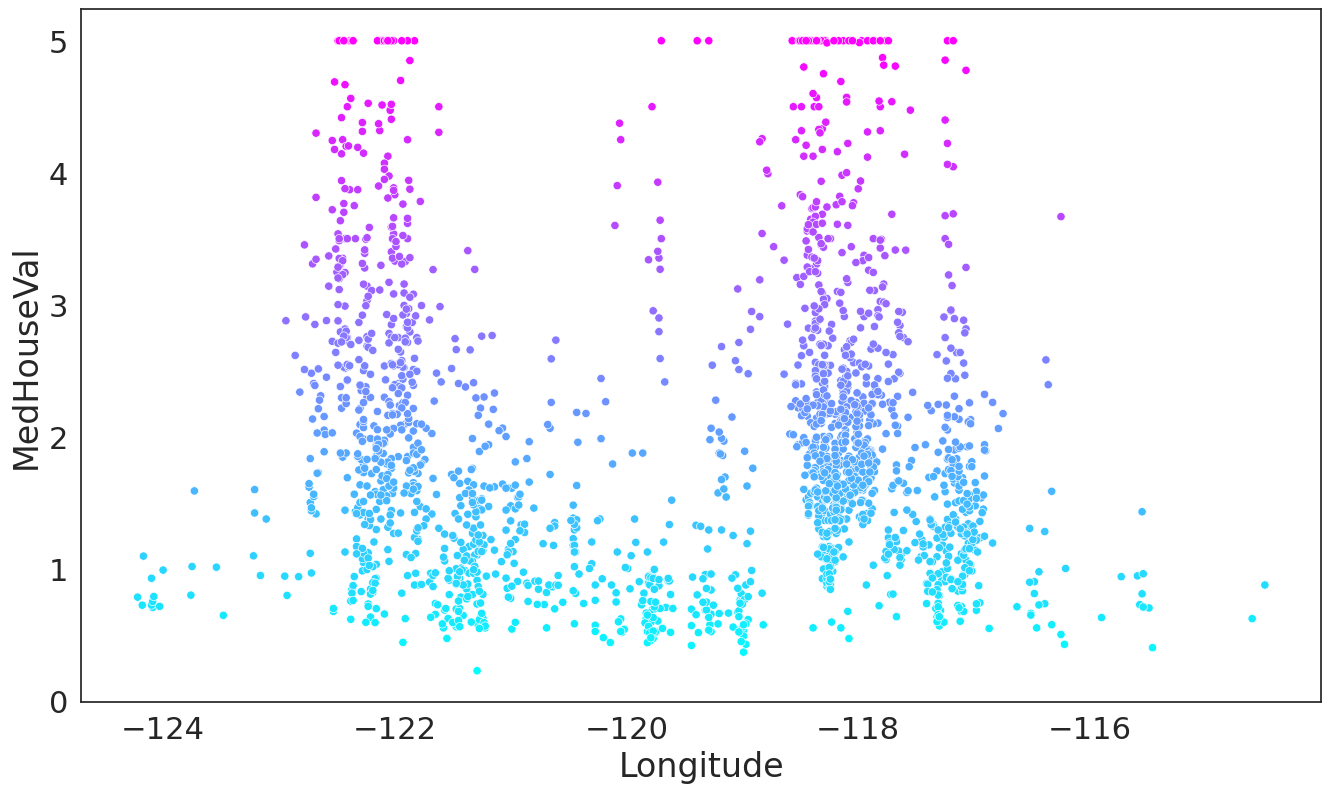

In [9]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data =sample_df,x=feature,y="MedHouseVal",hue="MedHouseVal",palette="cool",legend = False)

## Train the model with the dataframe 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, random_state=14)

In [13]:
x_train.shape

(15480, 8)

In [14]:
x_test.shape

(5160, 8)

## Train the model

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [21]:
model.fit(X=x_train, y=y_train)

LinearRegression()

In [23]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {model.coef_[i]}')

    MedInc: 0.438474508525983
  HouseAge: 0.00935116129425259
  AveRooms: -0.10485291226523144
 AveBedrms: 0.6254376794411848
Population: -5.732085479300333e-06
  AveOccup: -0.00808912291275113
  Latitude: -0.42674364803656867
 Longitude: -0.440471006915578


In [25]:
model.intercept_

np.float64(-37.43324877055105)

In [26]:
prediction = model.predict(x_test)

In [27]:
expected = y_test

In [30]:
prediction[:5]

array([2.00495783, 2.96368866, 1.29063596, 1.03668127, 2.98729066])

In [32]:
expected[:5]

array([1.625, 2.38 , 0.912, 1.098, 3.5  ])